**K Means Clustering with PCA on Spotify Dataset**

In [38]:
# Import required libraries
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the Spotify dataset
df = pd.read_csv('song_data_final.csv')


Dropping Songs with less than average popularity

In [ ]:

# calculate the average popularity of songs in the DataFrame
avg_popularity = df["Popularity"].mean()

# filter the DataFrame to keep only rows with popularity greater than or equal to the average
df = df[df["Popularity"] >= avg_popularity]



num_eliminated = len(df.index)
num_total = len(pd.read_csv("song_data_final.csv").index)
print(f"{num_eliminated} songs have been eliminated out of {num_total} total songs.")

# print the updated DataFrame
#print(df)


191 songs have been eliminated out of 1995 total songs.


1st Correlation matrix with Audio Features

<ipython-input-19-6f6ec68bcf29>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

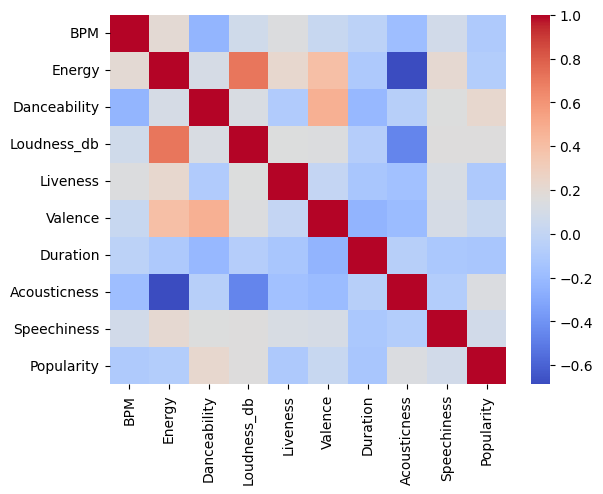

In [ ]:
# calculate the correlation matrix between audio features and popularity
corr_matrix = df.corr()

# calculate the correlation matrix between audio features and popularity
audio_features_corr = df.iloc[:,5:15].corr()
sns.heatmap(audio_features_corr, cmap="coolwarm")



**Inference:** to select audio feautures which are highly corelated with popularity are Danceability, Loudness, Acousticness, Valence and Speechiness.

In [ ]:
#Dropping non accounting Column
df = df.drop(columns=["Genre_metal", "Genre_opera"])

<Axes: >

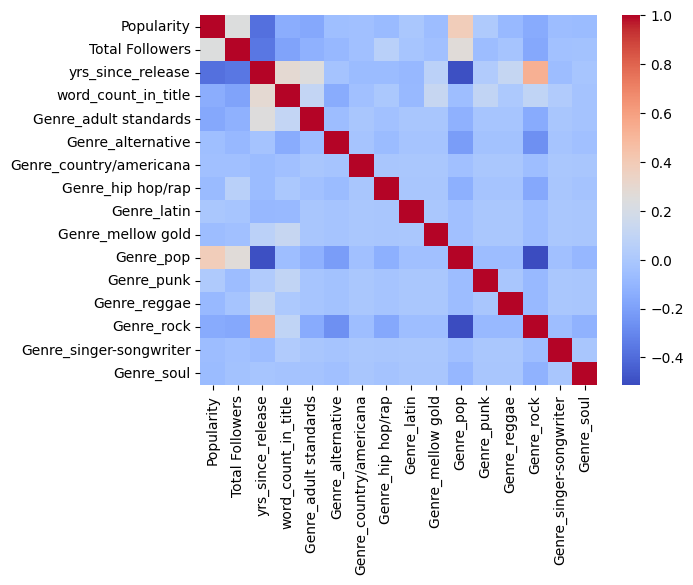

In [ ]:
# calculate the correlation matrix between genres and popularity
genres_corr = df.iloc[:,14:42].corr()
sns.heatmap(genres_corr, cmap="coolwarm")

**Inference:** to select genre which are highly corelated with popularity are Pop and Punk

**To sort the corelations**

In [35]:
corr = df.corr()["Popularity"].sort_values(ascending=False)
print(corr)


Popularity                 1.000000
Year                       0.386509
Genre_pop                  0.384539
Total Followers            0.240686
Danceability               0.227149
Loudness_db                0.159066
Acousticness               0.137787
Speechiness                0.083103
Valence                    0.029412
Genre_punk                 0.018145
Genre_latin               -0.007075
Genre_country/americana   -0.046817
Genre_alternative         -0.056368
Genre_singer-songwriter   -0.066689
Genre_mellow gold         -0.066689
Genre_soul                -0.074353
Genre_hip hop/rap         -0.077659
Genre_reggae              -0.080473
Energy                    -0.080963
BPM                       -0.096673
Liveness                  -0.107624
Unnamed: 0                -0.120824
Duration                  -0.127574
word_count_in_title       -0.141246
Genre_rock                -0.151827
Genre_adult standards     -0.164031
yrs_since_release         -0.386509
Name: Popularity, dtype: flo

<ipython-input-35-3d9b5e483cdc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()["Popularity"].sort_values(ascending=False)


**Calculating the Silhouette scores for all possible combination of the 6 features.**

In [86]:
# Fixed features
fixed_features = ['Genre_pop', 'Popularity']

# Features to permute
permute_features = ['Total Followers', 'Danceability', 'Loudness_db', 'Acousticness', 'Speechiness', 'Valence', 'Genre_punk']

# Generate all permutations of 3 features
feature_combinations = list(itertools.combinations(permute_features, 3))

# Initialize table
results_table = pd.DataFrame(columns=['Features', 'Silhouette Score'])

# Iterate through each combination of features
for combo in feature_combinations:
    # Add fixed features to combination
    features = fixed_features + list(combo)
    
    # Select subset of data with chosen features
    X = data[features]
    
    # Scale data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Perform k-means clustering with 7 clusters
    kmeans = KMeans(n_clusters=7, n_init='auto', random_state=42)
    pred_y = kmeans.fit_predict(X_scaled)
    
    # Calculate silhouette score
    score = silhouette_score(X_scaled, pred_y)
    
    # Add result to table
    results_table = pd.concat([results_table, pd.DataFrame({'Features': [features], 'Silhouette Score': [score]})])

# Print table
print(results_table)



                                            Features  Silhouette Score
0  [Genre_pop, Popularity, Total Followers, Dance...          0.234241
0  [Genre_pop, Popularity, Total Followers, Dance...          0.252293
0  [Genre_pop, Popularity, Total Followers, Dance...          0.276961
0  [Genre_pop, Popularity, Total Followers, Dance...          0.237491
0  [Genre_pop, Popularity, Total Followers, Dance...          0.322616
0  [Genre_pop, Popularity, Total Followers, Loudn...          0.244364
0  [Genre_pop, Popularity, Total Followers, Loudn...          0.296173
0  [Genre_pop, Popularity, Total Followers, Loudn...          0.245405
0  [Genre_pop, Popularity, Total Followers, Loudn...          0.337126
0  [Genre_pop, Popularity, Total Followers, Acous...          0.314742
0  [Genre_pop, Popularity, Total Followers, Acous...          0.272112
0  [Genre_pop, Popularity, Total Followers, Acous...          0.342411
0  [Genre_pop, Popularity, Total Followers, Speec...          0.296295
0  [Ge

**Inference:** 'Danceability', 'Speechiness', 'Genre_pop', 'Valence', 'Acousticness' has high silhouette score

**Performing PCA and K means Clustering on the selected Feautures.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

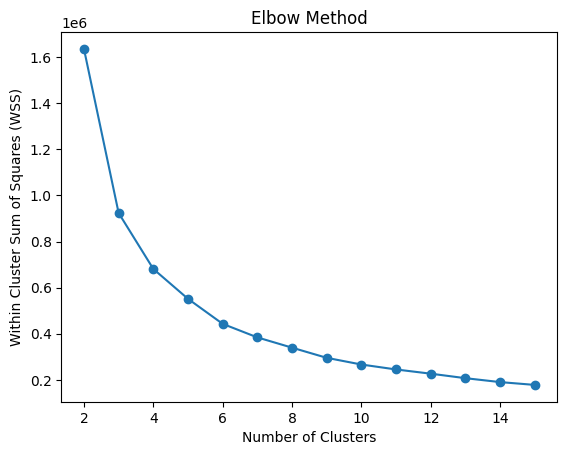

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


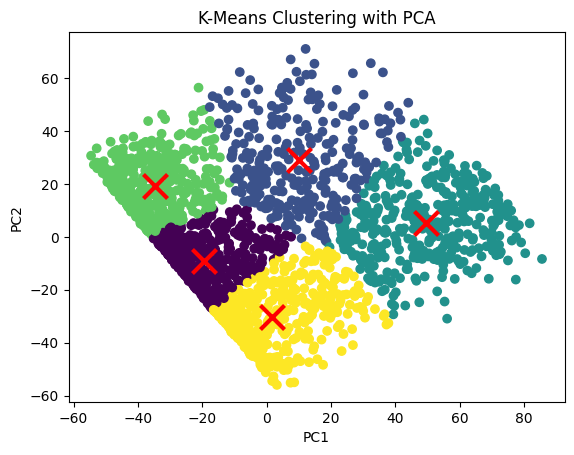

In [101]:

# Perform PCA
pca = PCA(n_components=2)
spotify_pca = pca.fit_transform(spotify_data[['Danceability', 'Genre_pop', 'Valence', 'Acousticness']])
spotify_pca = pd.DataFrame(spotify_pca, columns=['PC1', 'PC2'])

# Elbow method to find optimal number of clusters
wss = []
for i in range(2, 16):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(spotify_pca)
    wss.append(kmeans.inertia_)

plt.plot(range(2, 16), wss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Cluster Sum of Squares (WSS)')
plt.show()

# Perform k-means clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(spotify_pca)
spotify_pca['cluster'] = kmeans.predict(spotify_pca)

# Plot clusters
plt.scatter(spotify_pca['PC1'], spotify_pca['PC2'], c=spotify_pca['cluster'])
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], marker='x', s=300, linewidths=3, color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering with PCA')
plt.show()




**Plotting the mean value of the cluster feautures** - **CLUSTER ANALYSIS**

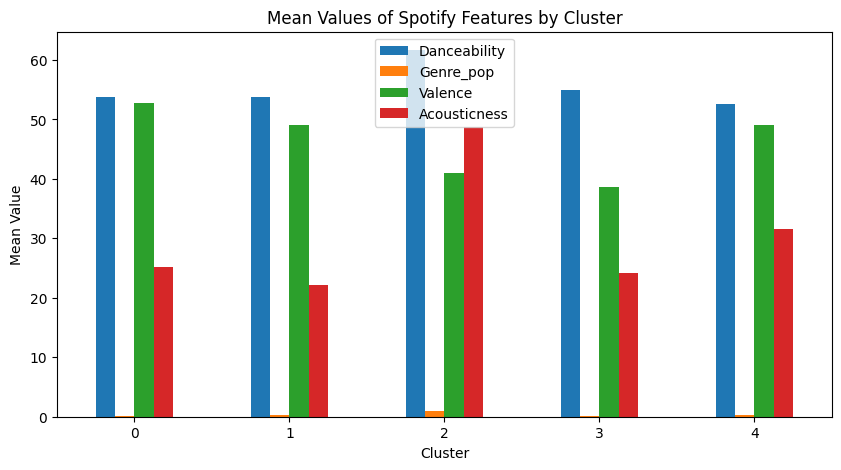

In [100]:
# Create a dataframe with the cluster labels and features
cluster_df = pd.concat([spotify_data, spotify_pca], axis=1)
cluster_df = cluster_df[['Danceability','Genre_pop', 'Valence', 'Acousticness', 'cluster']]

# Group the data by cluster and calculate the mean for each feature
cluster_means = cluster_df.groupby('cluster').mean()

# Plot bar plots for each cluster
cluster_means.plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=0)
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Mean Values of Spotify Features by Cluster')
plt.legend(loc='best')
plt.show()

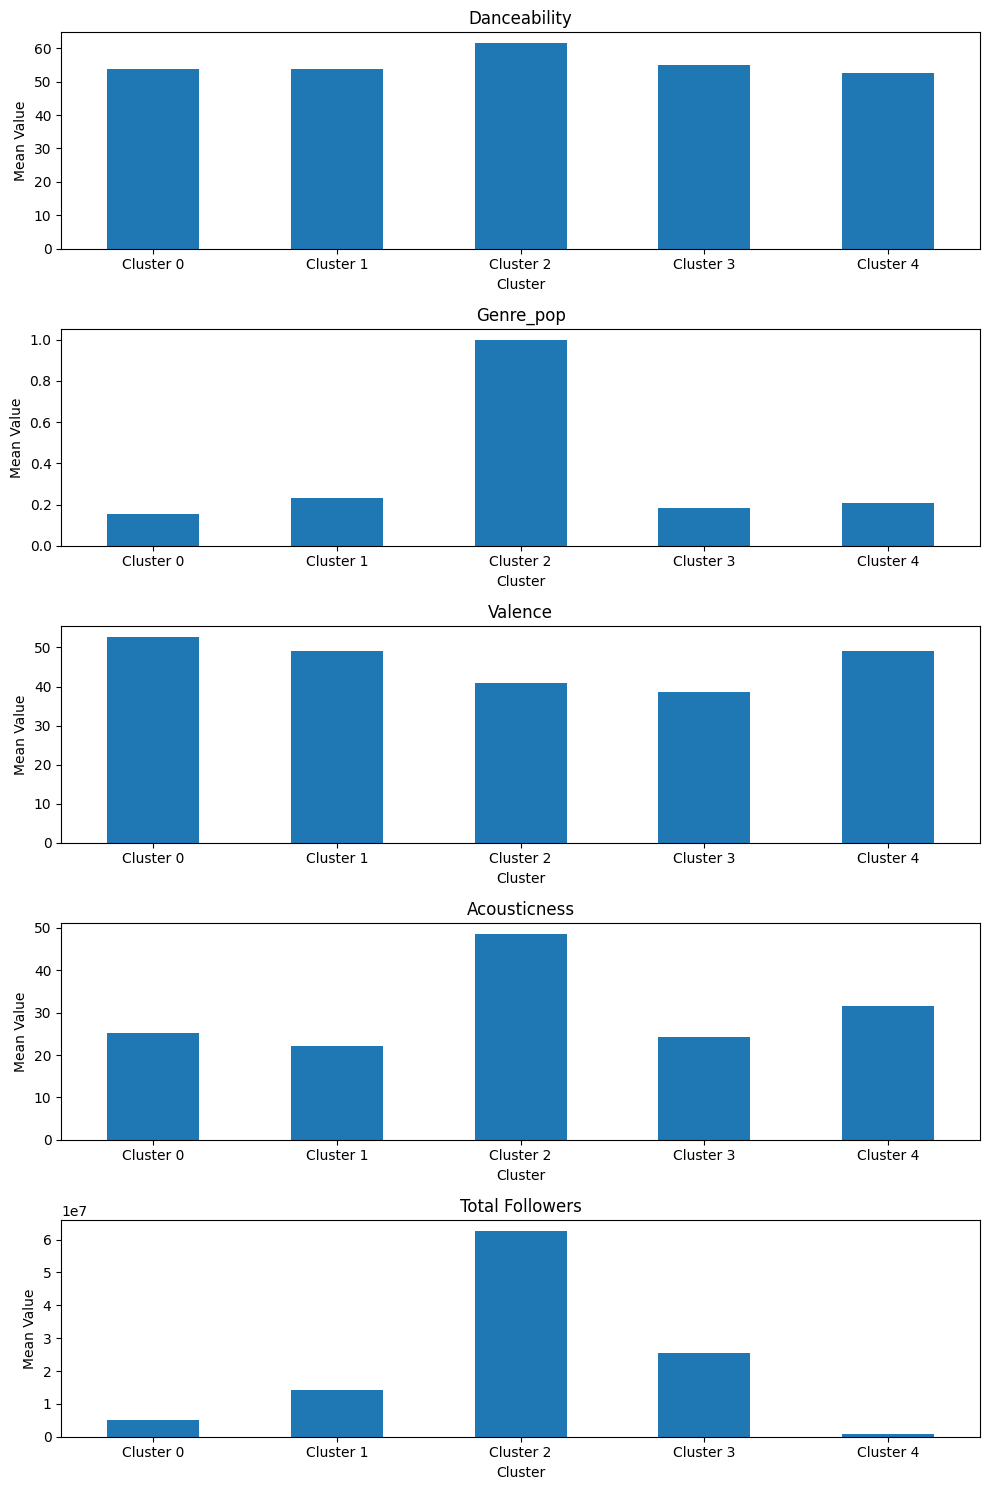

In [99]:
# Create a dataframe with the cluster labels and features
cluster_df = pd.concat([spotify_data, spotify_pca], axis=1)
cluster_df = cluster_df[['Danceability','Genre_pop', 'Valence', 'Acousticness', 'Total Followers', 'cluster']]

# Group the data by cluster and calculate the mean for each feature
cluster_means = cluster_df.groupby('cluster').mean()

# Plot bar plots for each cluster
# Plot bar plots for each cluster
fig, axes = plt.subplots(nrows=len(cluster_means.columns), figsize=(10, 15))
for i, feature in enumerate(cluster_means.columns):
    cluster_means[feature].plot(kind='bar', ax=axes[i])
    axes[i].set_xticklabels(['Cluster ' + str(j) for j in range(len(cluster_means))], rotation=0)
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Mean Value')
    axes[i].set_title(feature)
fig.tight_layout()
plt.show()


**Conclusion:** 
1. Songs which have higher valence and Danceability are tend to popular and have a higher follower rate
2. Songs with higher acousticness and medium danceability are also tend to popular
3. Songs with higher total followers are tend to be acoustic dominated.